# A brief analysis of podcast text data

In this notebook, we'll take a quick look at some key features and patterns in textual data from the podcast *My Brother, My Brother and Me*. 

This notebook just acts as a short prelude to the main objective with the data — building a machine-learning model that classifies pieces of text according to which brother was most likely to say them. The text classifier can be found in the notebook *McElroy ML.ipynb*.

We start with a csv containing all the "key" words said by each of the three hosts — Griffin, Justin, and Travis McElroy — from 50 one-hour-long episodes, and explore some of the important features within the data. The raw text was obtained from PDF transcripts of the episodes, and cleaned using some classic natural-language-processing techniques. The file *get_text.py* describes the process of cleaning and exporting the list of words and speakers to the csv.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import numpy as np
import seaborn as sns

plt.style.use("seaborn") #set Seaborn style

In [2]:
filename = r"C:\Users\arnav\OneDrive - OnTheHub - The University of Oxford\Documents\Coding, Summer 2020\McElroy Code\Datasets\words_50.csv"

#Read CSV with speakers and words
df = pd.read_csv(filename)

#Get lists/series of the boys' words, and remove NaN values
justin = df["justin"].dropna()
travis = df["travis"].dropna()
griffin = df["griffin"].dropna()

#Get Pandas series of word frequencies
gfreq = griffin.value_counts()
jfreq = justin.value_counts()
tfreq = travis.value_counts()

#Get dictionaries of word frequencies too
g = Counter(griffin)
j = Counter(justin)
t = Counter(travis)

### 1. Initializing the different lists and dictionaries

Once the data has been imported, we create two sets of Pandas series — one containing just a list of the words said by a particular brother, and the other containing the frequencies of each word. We also create dictionaries of the words and their frequencies. (This is just for convenience in later use.)

### 2. Most common words

We start by just taking a look at the 30 most common words said by each brother. The data imported has already been cleaned in the file *get_text.py*, using some tools from the NLP library `nltk`. This includes removing all the "stopwords", which are words that are extremely common in the English language — like "the", "your", "an", etc. — and that don't really add much value to our analysis.

An interesting thing we can look out for is the existence of *Zipf's law* within our dataset. The law simply states that the frequency of a given word (in *any* piece of text) is inversely proportional to its rank. This should resemble a $\frac{1}{x}$ dependence, like we see in many areas of physics! (The law works best when examined over all the text, including the stopwords.)

Text(0.5, 0, 'Frequency')

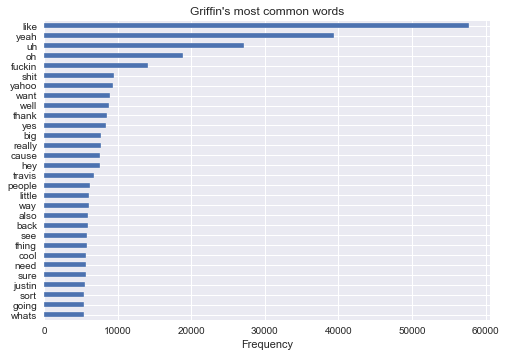

In [34]:
gfreq[:30][::-1].plot.barh()
plt.title("Griffin's most common words")
plt.xlabel("Frequency")

Text(0.5, 0, 'Frequency')

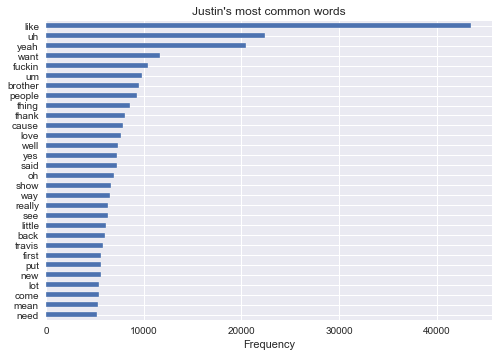

In [35]:
jfreq[:30][::-1].plot.barh()
plt.title("Justin's most common words")
plt.xlabel("Frequency")

Text(0.5, 0, 'Frequency')

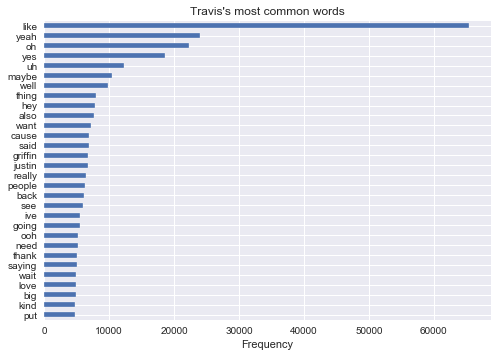

In [36]:
tfreq[:30][::-1].plot.barh()
plt.title("Travis's most common words")
plt.xlabel("Frequency")

### 3. Word counts and proportions

While the most-common-words graphs are pretty cool to see, there are certain words that I was interested to examine the splitting-between-the-brothers for. This next little piece of code, takes in a list of words you want to examine, and outputs the total frequency of the word, as well as the percentage of times it was said by a particular speaker.

As a long-time listener of the podcast, I was quite excited to see numerical data backing certain ideas I'd built of each brother's speaking style. For example, Griffin swears a lot more than the other two (which is very clearly evident below), and Justin talks *a lot* about food. Some of the other word mentions I looked for were: sponsors for the podcast, each brother's hometown, and the different nicknames they have for each other.

While a lot of this analysis is just pure fun for a big fan of the podcast (like me), it's also really helpful to have a good idea of the data we're working with and how it behaves, if we're to build a full text classifier with it (like in *McElroy ML.ipynb*).

In [17]:
#Check word counts/proportions:

#Words to check
words = ["like", "fuckin", "fuck", "shit", "uh", "yahoo", "trav", "juice", "jman", "riddle", "piss", "wild", "bean", \
"boy", "griffin", "travis", "justin", "munch", "squad", "taco", "burger", "pizza", "garbage", "wild", "buckwild", "buick", \
"anonymous", "wrong", "oh", "huh", "yeah", "dude", "pokémon", "question", "powerful", "cocacola", "yall", \
"final", "stampscom", "meundies", "ziprecruiter", "squarespace", "play", "space", "horse", "money", "zone", "huntington", \
"cincinnati", "austin", "vape", "brother", "cool", "beans"]

#Get relative uses of the words
for word in words:

    g1 = g[word]
    t1 = t[word]
    j1 = j[word]
    tot = g1 + t1 + j1

    if tot==0:
        gp, tp, jp = 0, 0, 0
    else:
        #Percentages
        gp = round(g1*100/tot, 2)
        tp = round(t1*100/tot, 2)
        jp = round(j1*100/tot, 2)

    print('"' + word + '"' + " (Frequency = " + str(tot) + ")\n")
    print("Griffin: " + str(gp) + "%")
    print("Justin: " + str(jp) + "%")
    print("Travis: " + str(tp) + "%" + "\n")

"like" (Frequency = 166778)

Griffin: 34.64%
Justin: 26.09%
Travis: 39.26%

"fuckin" (Frequency = 25950)

Griffin: 54.65%
Justin: 40.18%
Travis: 5.16%

"fuck" (Frequency = 9963)

Griffin: 49.1%
Justin: 32.04%
Travis: 18.86%

"shit" (Frequency = 14214)

Griffin: 67.08%
Justin: 17.39%
Travis: 15.53%

"uh" (Frequency = 61957)

Griffin: 43.94%
Justin: 36.13%
Travis: 19.94%

"yahoo" (Frequency = 10071)

Griffin: 92.34%
Justin: 5.9%
Travis: 1.76%

"trav" (Frequency = 2893)

Griffin: 63.29%
Justin: 35.26%
Travis: 1.45%

"juice" (Frequency = 2755)

Griffin: 66.82%
Justin: 20.25%
Travis: 12.92%

"jman" (Frequency = 138)

Griffin: 0.0%
Justin: 0.0%
Travis: 100.0%

"riddle" (Frequency = 1507)

Griffin: 20.5%
Justin: 13.47%
Travis: 66.03%

"piss" (Frequency = 1683)

Griffin: 24.96%
Justin: 26.5%
Travis: 48.54%

"wild" (Frequency = 5109)

Griffin: 41.08%
Justin: 53.67%
Travis: 5.25%

"bean" (Frequency = 753)

Griffin: 30.54%
Justin: 54.32%
Travis: 15.14%

"boy" (Frequency = 5154)

Griffin: 35.97%
J

This next piece of code is just a helpful visualisation of the word counts/proportions as done above, using a stacked bar graph.

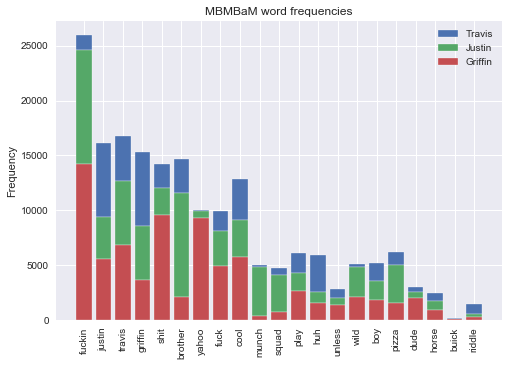

In [38]:
#Create stacked bar graph of word frequencies

#Words to plot
word_plot = ["fuckin", "justin", "travis", "griffin", "shit", "brother", "yahoo", "fuck", "cool", "munch", "squad", "play", \
 "huh", "unless", "wild", "boy", "pizza", "dude", "horse", "buick", "riddle"]

#Initialize empty lists
g_word = []
t_word = []
j_word = []

#Add word frequencies to lists
for word in word_plot:

    g1 = g[word]
    t1 = t[word]
    j1 = j[word]
    tot = g1 + t1 + j1

    if tot==0:
        gp, tp, jp = 0, 0, 0
    else:
        #Percentages
        gp = round(g1*100/tot, 2)
        tp = round(t1*100/tot, 2)
        jp = round(j1*100/tot, 2)
    
    #Can append (gp, tp, jp) instead if you want percentages
    g_word.append(g1)
    t_word.append(t1)
    j_word.append(j1)

#Convert to numpy arrays
g_word = np.array(g_word)
t_word = np.array(t_word)
j_word = np.array(j_word)

fig, ax = plt.subplots()

plt.bar(word_plot, t_word, label="Travis", edgecolor="white", bottom=(g_word+j_word)) #top of bar chart stack
plt.bar(word_plot, j_word, label="Justin", edgecolor="white", bottom=g_word)
plt.bar(word_plot, g_word, label="Griffin", edgecolor="white")

plt.xticks(rotation=90)

plt.title("MBMBaM word frequencies")
plt.ylabel("Frequency")
plt.legend()

plt.show()



### 4. Total number of words spoken

Next, we'll just take a quick look at the total number of words each brother says. Examining the level of balance or imbalance within the dataset is an important part of building a text classifier, like we do in the other notebook.

We notice that Justin (easily) speaks the most — he both introduces and ends the show — while Travis speaks the least. This is something that we need to be aware of while building the text classifier, and is addressed in the ML notebook.

Total words: 

Griffin: 1863955 words
Travis: 1539416 words
Justin: 2062751 words


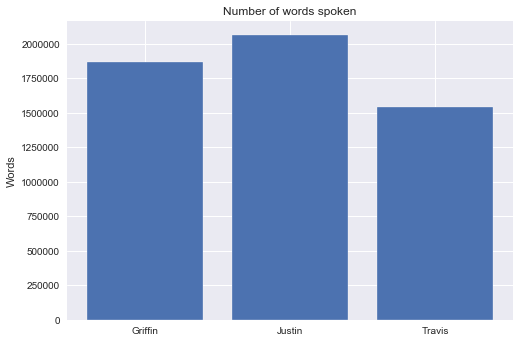

In [37]:
#Total words

total = len(justin)+len(griffin)+len(travis)

plt.bar(["Griffin", "Justin", "Travis"], [len(griffin), len(justin), len(travis)])
plt.title("Number of words spoken")
plt.ylabel("Words")

print("Total words: \n")
print("Griffin: " + str(len(griffin)) + " words")
print("Travis: " + str(len(travis)) + " words")
print("Justin: " + str(len(justin)) + " words")

In [21]:
#Number of different words spoken
print("Total number of different words: \n")
print("Griffin: " + str(len(g)) + " different words")
print("Travis: " + str(len(t)) + " different words")
print("Justin: " + str(len(j)) + " different words")

Total number of different words: 

Griffin: 12058 different words
Travis: 10162 different words
Justin: 12975 different words


### 5. Wordclouds

Finally, for a really cool piece of text-data visualisation, we'll create "wordclouds" for each brother. A wordcloud is just an image containing a lot of the different words in a given list, where the size of the word corresponds to the frequency of its occurence. It's a pretty way of visualising the data, and can sometimes be useful to quickly see certain trends in the data.

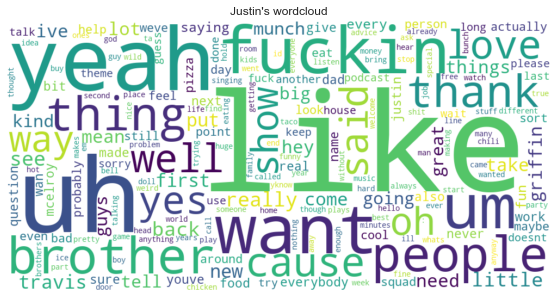

In [28]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords, background_color="white").generate_from_frequencies(j)

plt.figure(figsize=(10, 5), facecolor="white")
plt.title("Justin's wordcloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

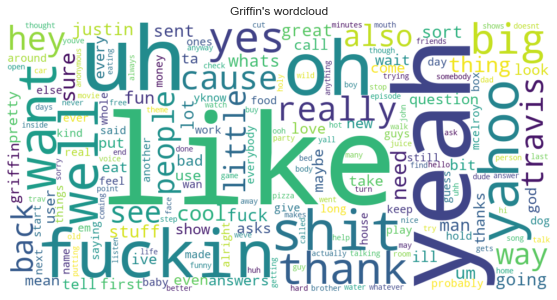

In [27]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords, background_color="white").generate_from_frequencies(g)

plt.figure(figsize=(10, 5), facecolor="white")
plt.title("Griffin's wordcloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

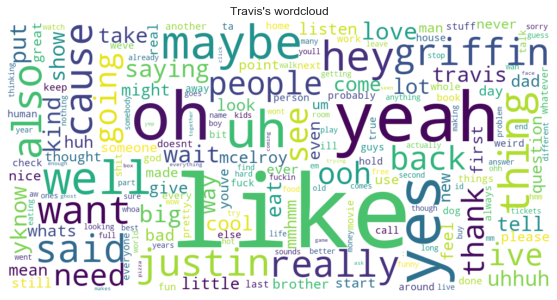

In [41]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords, background_color="white").generate_from_frequencies(t)

plt.figure(figsize=(10, 5), facecolor="white")
plt.title("Travis's wordcloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()